# Format Results

In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# retain_results = "results/qwen2-1.5b_ft_DS_noLORA_lr1.5e-05_checkpoint-618_retain99_forget01_perturbed.csv"
retain_results = "results/knowundo-copyright/qwen2-1.5b_retain_knowundo-copyright_checkpoint-347_noLORA_3e-05_10_0.01_retention_unlearn_seed42.csv"
df_retain = pd.read_csv(retain_results)

In [10]:
# results = "results/tofu/sept03_experiments/all_single_layer_comparison_grad-ascent"
results = "results/knowundo-copyright/all_single_layer_comparison_grad-ascent"

files = os.listdir(results)
files = [f for f in files if re.match(r".*\.csv", f)]


# read all files
df = pd.DataFrame()
for f in files:
    pth = os.path.join(results, f)
    tmp = pd.read_csv(pth)
    # replace "Method" column with layer.#
    layer_num = tmp['Method'].values[0].split("_")[8].split(".")[1]
    tmp['Layer'] = layer_num
    df = pd.concat([df, tmp])

df['Layer'] = df['Layer'].astype(int)
df = df.sort_values(by=['Layer']).reset_index(drop=True)
print(f"Number of rows: {len(df)}")
df.head()

Number of rows: 28


,ROUGE Real Authors,Prob. Real Authors,Truth Ratio Real Authors,ROUGE Real World,Prob. Real World,Truth Ratio Real World,ROUGE Retain,Prob. Retain,Truth Ratio Retain,ROUGE Forget,Prob. Forget,Truth Ratio Forget,Model Utility,Forget Quality,Method,Submitted By,Layer
0,0.797667,0.247238,0.281180,0.825499,0.356011,0.413963,0.691878,0,0,0.552977,0,0,0.767187,0,unlearn_2_adamw_grad-ascent_5e-05_none_1_800_l...,keenan,0
1,0.791333,0.253550,0.330766,0.758120,0.302632,0.368845,0.761575,0,0,0.596921,0,0,0.770058,0,unlearn_2_adamw_grad-ascent_5e-05_none_1_800_l...,keenan,1
2,0.837667,0.267371,0.285645,0.792023,0.377200,0.449630,0.779099,0,0,0.682033,0,0,0.802157,0,unlearn_2_adamw_grad-ascent_5e-05_none_1_800_l...,keenan,2
3,0.822667,0.271533,0.290817,0.809829,0.364109,0.429981,0.783361,0,0,0.665391,0,0,0.804950,0,unlearn_2_adamw_grad-ascent_5e-05_none_1_800_l...,keenan,3
4,0.832667,0.298215,0.319622,0.826211,0.402053,0.475716,0.802985,0,0,0.728281,0,0,0.820421,0,unlearn_2_adamw_grad-ascent_5e-05_none_1_800_l...,keenan,4


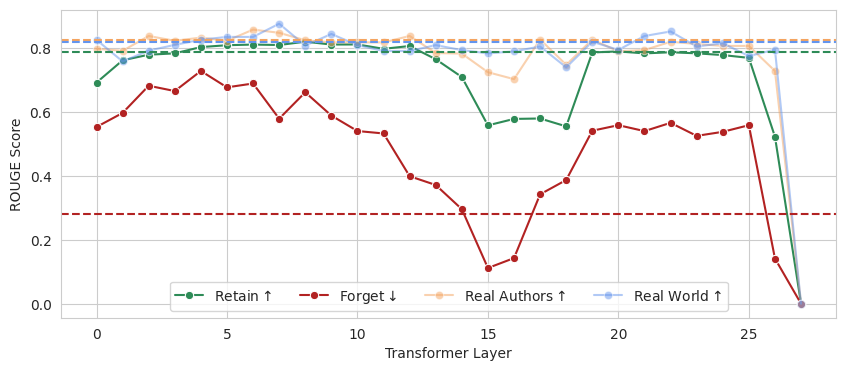

In [11]:
# plot each layer on the x axis and both the retain rouge and forget rouge on the y axis
sns.set_style(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 4))

sns.lineplot(x="Layer", y="ROUGE Retain", data=df, ax=ax, marker="o", label="Retain$\\uparrow$", c="seagreen", alpha=1)
sns.lineplot(x="Layer", y="ROUGE Forget", data=df, ax=ax, marker="o", label="Forget$\\downarrow$", c="firebrick", alpha=1)
sns.lineplot(x="Layer", y="ROUGE Real Authors", data=df, ax=ax, marker="o", label="Real Authors$\\uparrow$", c="sandybrown", alpha=0.5)
sns.lineplot(x="Layer", y="ROUGE Real World", data=df, ax=ax, marker="o", label="Real World$\\uparrow$", c="cornflowerblue", alpha=0.5)

# plot horizontal line for retain rouge and forget rouge
plt.axhline(y=df_retain['ROUGE Retain'].values[0], color='seagreen', linestyle='--')
plt.axhline(y=df_retain['ROUGE Forget'].values[0], color='firebrick', linestyle='--')
plt.axhline(y=df_retain['ROUGE Real Authors'].values[0], color='sandybrown', linestyle='--')
plt.axhline(y=df_retain['ROUGE Real World'].values[0], color='cornflowerblue', linestyle='--')

#change x axis name
ax.set_xlabel("Transformer Layer")
ax.set_ylabel("ROUGE Score")

# ax.get_legend().remove()
# move legend to 1/4 of the way to the left and all the way down
ax.legend(loc='lower center', ncol=4)

plt.show()

# save figure as svg
# fig.savefig("figures/layerwise_rouge_comparison_grad-ascent.svg", format="svg")
# fig.savefig("figures/knowundo_layerwise_rouge_grad-ascent.svg", format="svg")